In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.special

In [2]:
def W_to_dBm(W):
    '''converts quantity in Watts to deciBel-milliWatts'''
    return (10*np.log10(W)) + 30

def dBm_to_W(dBm):
    '''converts quantity in deciBel-milliWatts to Watts'''
    return 10**((dBm - 30)/10)

### Radiometer 
The ideal radiometer equation is 

$$\sigma_{T} = \frac{T_{sys}}{\sqrt{\Delta \nu t}} = \frac{T_{sys}}{\sqrt{B t}}$$

where $\sigma_{T}$ is the rms uncertainty of the noise temperature measurement, $T_{sys}$ is the noise temperature of the system, $\Delta \nu $ or $B$ is the integrated bandwidth or bandwidth over which a single measurement is made, and $t$ is the integration time or the time over which a measurement is averaged.



In [3]:
#ideal radiometer equation noise

Tsys = 50 #Kelvin
bandwidth = 390 *1e3 #Hz
int_time = 42 *1e-3 #seconds (integration time)
sigma_s = Tsys / np.sqrt(bandwidth*int_time) #Kelvin
print(sigma_s, 'K')

0.3906726924487462 K


For a telescope with a system temperature of 50 K, an integration time of 42 ms, and a channel with a bandwidth  of 390 kHz, the uncertainty or noise of the system is 0.39 K or ~0.4 K.

At 10$\sigma$ and 100$\sigma$ (in K), respectively

In [4]:
print(10*sigma_s)
print(100*sigma_s)

3.906726924487462
39.067269244874616


### Radiation temperature to Flux
Brightness temperature per Spectral flux density or spectral irradiance

For a source with flux density or spectral power per unit area, $P_{src}$, the total amount of spectral power incident on the antenna, $P_{rec}$ is determined by the collecting area of the antenna. This can be expressed as
$$ P_{rec} = A_{eff} S_{src} $$
where $A_{eff}$ effective collecting area of the telescope. 

A convenient practical way of expressing the power per unit frequency of the receiving antenna is expressing the power in terms of the temperature produced or received by the antenna. This temperature is not the physical temperature of the antenna but the temperature equivalent to the temperature 
of a matched resistor whose thermally generated power per unit frequency in the low-frequency Nyquist approximation. Thus,

$$ P = kT $$

where k is the Boltzmann's constant. 

From these two equations, the antenna temperature due to an unpolarized source is
$$ T = \frac{P_{rec}}{k} = \frac{1}{2}\frac{A_{eff} S_{src}}{k} $$

The factor $\frac{1}{2}$ is added since the antenna only takes in power that matches its polarization and nothing from an orthogonally polarized source. Because of this, only half of the incident power is effectively raising the antenna temperature.

Then, the spectral irradiance or the ratio of brightness temperature to the spectral flux density is
$$ \frac{T}{S_{src}} = \frac{A_{eff}}{2k} .$$
The effective collecting area is just the product of the antenna effeciency $\eta$ and, for a reflector dish, the geometric area of opening of the dish $A$ with radius $r$,
$$A_{eff} = \eta A = \eta (\pi r^2).$$

Thus the spectral irradiance is 
$$ \frac{T}{S_{src}} = \frac{\eta (\pi r^2)}{2k} .$$
Since 1 $Jy$ is equal to $1 \times10^{-26} J/m^2 $, we can express this equation in terms of $K/Jy$ by multiplying the ratio with this factor.

Ref: 
[[1](https://www.mpifr-bonn.mpg.de/948177/Kerp_FundamentalsII.pdf)]
[[2](https://www.cv.nrao.edu/~sransom/web/Ch3.html#S1.SS4)]
[[3](https://www.cv.nrao.edu/~sransom/web/Ch3.html#S1.SS6)]

In [5]:
#Brightness temperature per Spectral flux density or spectral irradiance

kB = 1.38e-23 #Boltzmann's constant in J/K
Jy = 1e-26 # unit of spectral flux density; Watts per square meter per Hz or Joules per square meter

radius = 3 #apperture radius in meters
ant_eff = 0.7 #antenna efficiency; unitless, from 0 to 1

K_per_Jy = ((ant_eff*np.pi*(radius)**2)*Jy)/(2*kB)
print(K_per_Jy, 'K/Jy')

0.0071710267092810484 K/Jy


For a six-meter dish, the brightness temperature received from a 1-Jy source is 0.007 K or 7 mK.

Another way to look at it is doing the following calculations

In [6]:
#A gain of 1 K/Jy means an effective collecting area of:
T_ant = 1 #1K
A_eff = 2*kB*T_ant/Jy
print(A_eff, 'm^2')

2760.0 m^2


In [7]:
#For a six-meter dish:
A_eff_6 = ant_eff*np.pi*radius**2

print('''Taking the ratio of the effective collecting area of a six meter dish and the effective collecting area for a gain of 1K/Jy, 
we can determine the effective gain of the six-meter telescope''')
print('A_eff of six-meter dish:', A_eff_6, 'm^2')
print('gain:', A_eff_6/A_eff, 'K/Jy')

Taking the ratio of the effective collecting area of a six meter dish and the effective collecting area for a gain of 1K/Jy, 
we can determine the effective gain of the six-meter telescope
A_eff of six-meter dish: 19.792033717615695 m^2
gain: 0.0071710267092810484 K/Jy


So, how much spectral power in Jy or J/m^2 ( or W/m^2/Hz) is needed to raise the brightness temperature by 10 sigma? 100 sigma?

In [8]:
#in Jy
T4K_SI = (10*sigma_s/K_per_Jy)
T40K_SI = (100*sigma_s/K_per_Jy)
approx_T4K_SI = (10*0.4/0.007)
approx_T40K_SI = (100*0.4/0.007)
print('10σ:', T4K_SI, 'Jy')
print('100σ:', T40K_SI, 'Jy')
print('10σ (approx.):', approx_T4K_SI, 'Jy')
print('100σ (approx.):', approx_T40K_SI, 'Jy')

#in SI unit
T4K_SI = (10*sigma_s/K_per_Jy)*Jy
T40K_SI = (100*sigma_s/K_per_Jy)*Jy
approx_T4K_SI = (10*0.4/0.007)*Jy
approx_T40K_SI = (100*0.4/0.007)*Jy
print('10σ:', T4K_SI, 'J/m^2')
print('100σ:', T40K_SI, 'J/m^2')
print('10σ (approx.):', approx_T4K_SI, 'J/m^2')
print('100σ (approx.):', approx_T40K_SI, 'J/m^2')


10σ: 544.793246890464 Jy
100σ: 5447.93246890464 Jy
10σ (approx.): 571.4285714285714 Jy
100σ (approx.): 5714.285714285714 Jy
10σ: 5.44793246890464e-24 J/m^2
100σ: 5.44793246890464e-23 J/m^2
10σ (approx.): 5.714285714285715e-24 J/m^2
100σ (approx.): 5.714285714285714e-23 J/m^2


The values with (approx.) are calculated by rounding off the spectral irradiance to 0.007 K/Jy and the $\sigma_{T}$ to 0.4 K. This is just to show how much the estimation by rounding deviate when using the actual values.

### Brightness temperature from drone noise calibrator 

How much spectral power/brightness emitted by the drone noise calibrator can raise the brightness temperature on the telescope by 10 sigma? 100 sigma?

To calculate for the spectral power of the drone noise source, $S_{drone}$ that can raise the system temperature of the telescope by $10\sigma$ or $100\sigma$, we can use the temperature to flux ratio

$$ \frac{T_{A}}{S_{src}} S_{drone} = T_{add} $$

where $T_{add}$ is the brightness temperature added to the system and $T_{A} / S_{src}$ ratio calculated to be $~7 mK$.
Using the flux density of the drone noise calibrator, we can calculate the required amount of power emitted by the drone given the receiving antenna's bandwidth (at the correlator's limit), $\Delta \nu$ and surface area $A_s$ of the spherical wave whose radius is determined as the distance between the telescope and flight altitude of the emitting drone

$$ P_{drone} = S_{drone} \times \Delta \nu \times A_s = \frac{T_{add}}{T_{A}/S_{src}}\times \Delta \nu \times A_s.$$

Thus, the drone flight altitude and the bandwidth of the correlator are required to determine the operating power of the noise source.

### Farfield condition and flight altitude of the drone

Before looking into the required power for a specific bandwidth, we can start by looking into the flight altitude of the drone during beam mapping. This altitude is determined through satisfying the farfield condition of a specific frequency considering the aperture diameter. This is expressed as $\frac{2D^2}{\lambda}$. For instance, the proposed narrow band source at 425 MHz would require a minimum distance of 102 m. Doing a full HIRAX beam measurement would require a minimum flight altitude of 192 m and for CHORD, a minimum of 360 m. 

In [9]:
def farfield_eqn(D, freq):
    'D in meters, freq in MHz'
    'returns farfield in meters'
    wl = 299.792/(freq)
    return 2*(D**2)/wl

In [10]:
print('Farfield distance (in meters) of a specific frequency for a six-meter dish')
print('425MHz:', farfield_eqn(6,425))
print('300MHz:', farfield_eqn(6,300))
print('400MHz:', farfield_eqn(6,400))
print('800MHz:', farfield_eqn(6,800))
print('1500MHz:', farfield_eqn(6,1500))

Farfield distance (in meters) of a specific frequency for a six-meter dish
425MHz: 102.07076906655281
300MHz: 72.04995463521375
400MHz: 96.066606180285
800MHz: 192.13321236057
1500MHz: 360.2497731760688


### Saturating the digital correlator

How can the correlator bandwidth affect the required power of the drone noise source?

The bandwidth parameter, on the other hand, can dictate the allowable power of the noise source since issues such as non-linearity and digital saturation limit the performance of the correlator. The correlator sets both integration time and bandwidth. ICEboard (the correlator) has a 42-ms data acquisition rate $-$ its fastest data acquisition rate while its 400-MHz bandwidth is divided into the frequency channels with 390-kHz band. The uncertainty of this instrument gives us about 4K and 40K for $10\sigma$ and $100\sigma$, respectively. 


What is the relevance of $10\sigma$ and $100\sigma$?

If the drone flying over the dish directly above the boresight raises the brightness temperature by as much as $40 K$, then the the signal-to-system noise temperature or the SNR, as defined in the [Mena-Parra et al paper](https://arxiv.org/pdf/1803.04296.pdf), is 
$$ SNR = \frac{T_{added}}{T_{sys}} = \frac{40K}{50K} = 0.8 \sim 1. $$

The quantization bias of the correlator is the magnitude uncertainty due to the quantization of the measured visibility (unquantized, analog visibility to a digital visibility). A snip of figure 7 from the paper is shown below. At SNR = $10^0$, the “conversion” from analog visibility to digital visibility produces an uncertainty or bias of $10^{-3}$ or $0.1\%$ according the the color scale. If the drone calibrator emits power that raises the brightness temperature to $500 K$, then $SNR = \frac{T_{added}}{T_{sys}} = 500/50 = 10$ resulting to $\sim100\%$ uncertainty, thereby, saturating the correlator.

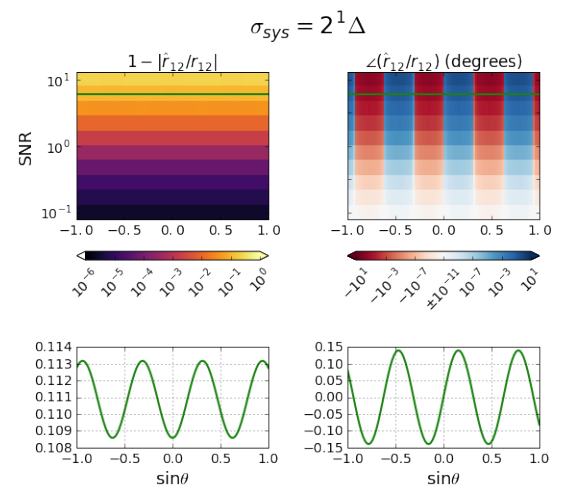

Therefore, to avoid saturation, we can limit the magnitude bias to $0.1\%$ or about $40 K$ to $50 K$ additional temperature from the drone.

#### Upper limit of the calibrator's power

Using the equation for $P_{drone}$ and setting $40K$ as the limit, we can now calculate for the power of the calibrator. Having a narrow-source band, in this case, a 425-MHz signal with 200-Hz bandwidth means that all of the power is received in just one 390-kHz channel of the correlator. To limit the brightness temperature added to the system to $40 K$, the maximum power of the calibrator should be set at $-85.3 dBm$. In case of the wide band source where the maximum frequency is set at 800 MHz and source bandwidth of 400 MHz, the maximum power of the calibrator should be set at $-49.6 dBm$ and flying at an altitude of 200 m AGL.

In [11]:
altitude = 120
SA = 4*np.pi*(altitude**2)
bw = 390 *1e3
Pw4K_SI = T4K_SI*bw* SA
Pw40K_SI = T40K_SI*bw* SA
approx_Pw4K_SI = approx_T4K_SI*bw* SA
approx_Pw40K_SI = approx_T40K_SI*bw* SA

print('Required power of the drone to raise the temperature by 10σ or 100σ at {} m AGL and bandwidth of 390 kHz'.format(altitude))
print('10σ:', W_to_dBm(Pw4K_SI), 'dBm')
print('100σ:', W_to_dBm(Pw40K_SI), 'dBm')
print('10σ (approx.):', W_to_dBm(approx_Pw4K_SI), 'dBm')
print('100σ (approx.):', W_to_dBm(approx_Pw40K_SI), 'dBm')

SA = 4*np.pi*(altitude**2)
bw = 400*1e6
Pw4K_SI = T4K_SI*bw* SA
Pw40K_SI = T40K_SI*bw* SA
approx_Pw4K_SI = approx_T4K_SI*bw* SA
approx_Pw40K_SI = approx_T40K_SI*bw* SA

print('Required power of the drone to raise the temperature by 10σ or 100σ at {} m AGL and bandwidth of 400 MHz'.format(altitude))
print('10σ:', W_to_dBm(Pw4K_SI), 'dBm')
print('100σ:', W_to_dBm(Pw40K_SI), 'dBm')
print('10σ (approx.):', W_to_dBm(approx_Pw4K_SI), 'dBm')
print('100σ (approx.):', W_to_dBm(approx_Pw40K_SI), 'dBm')

SA = 4*np.pi*(altitude**2)
bw = 1200*1e6
Pw4K_SI = T4K_SI*bw* SA
Pw40K_SI = T40K_SI*bw* SA
approx_Pw4K_SI = approx_T4K_SI*bw* SA
approx_Pw40K_SI = approx_T40K_SI*bw* SA

print('Required power of the drone to raise the temperature by 10σ or 100σ at {} m AGL and bandwidth of 1200 MHz'.format(altitude))
print('10σ:', W_to_dBm(Pw4K_SI), 'dBm')
print('100σ:', W_to_dBm(Pw40K_SI), 'dBm')
print('10σ (approx.):', W_to_dBm(approx_Pw4K_SI), 'dBm')
print('100σ (approx.):', W_to_dBm(approx_Pw40K_SI), 'dBm')

Required power of the drone to raise the temperature by 10σ or 100σ at 120 m AGL and bandwidth of 390 kHz
10σ: -94.15131321314833 dBm
100σ: -84.15131321314833 dBm
10σ (approx.): -93.9440108554245 dBm
100σ (approx.): -83.9440108554245 dBm
Required power of the drone to raise the temperature by 10σ or 100σ at 120 m AGL and bandwidth of 400 MHz
10σ: -64.0413593701337 dBm
100σ: -54.041359370133705 dBm
10σ (approx.): -63.83405701240987 dBm
100σ (approx.): -53.83405701240987 dBm
Required power of the drone to raise the temperature by 10σ or 100σ at 120 m AGL and bandwidth of 1200 MHz
10σ: -59.27014682293708 dBm
100σ: -49.27014682293708 dBm
10σ (approx.): -59.062844465213246 dBm
100σ (approx.): -49.06284446521323 dBm


In [12]:
alt_h = 200
SA = 4*np.pi*(alt_h**2)
bw = 400*1e6
Pw4K_SI = T4K_SI*bw* SA
Pw40K_SI = T40K_SI*bw* SA
approx_Pw4K_SI = approx_T4K_SI*bw* SA
approx_Pw40K_SI = approx_T40K_SI*bw* SA

print('Required power of the drone to raise the temperature by 10σ or 100σ at '+str(alt_h)+' m AGL and bandwidth of 400 MHz')
print('10σ:', W_to_dBm(Pw4K_SI), 'dBm')
print('100σ:', W_to_dBm(Pw40K_SI), 'dB')
print('10σ (approx.):', W_to_dBm(approx_Pw4K_SI), 'dBm')
print('100σ (approx.):', W_to_dBm(approx_Pw40K_SI), 'dBm')

SA = 4*np.pi*(alt_h**2)
bw = 1200*1e6
Pw4K_SI = T4K_SI*bw* SA
Pw40K_SI = T40K_SI*bw* SA
approx_Pw4K_SI = approx_T4K_SI*bw* SA
approx_Pw40K_SI = approx_T40K_SI*bw* SA

print('Required power of the drone to raise the temperature by 10σ or 100σ at '+str(alt_h)+' m AGL and bandwidth of 1200 MHz')
print('10σ:', W_to_dBm(Pw4K_SI), 'dBm')
print('100σ:', W_to_dBm(Pw40K_SI), 'dBm')
print('10σ (approx.):', W_to_dBm(approx_Pw4K_SI), 'dBm')
print('100σ (approx.):', W_to_dBm(approx_Pw40K_SI), 'dBm')

Required power of the drone to raise the temperature by 10σ or 100σ at 200 m AGL and bandwidth of 400 MHz
10σ: -59.60438437780658 dBm
100σ: -49.60438437780658 dB
10σ (approx.): -59.397082020082735 dBm
100σ (approx.): -49.397082020082735 dBm
Required power of the drone to raise the temperature by 10σ or 100σ at 200 m AGL and bandwidth of 1200 MHz
10σ: -54.833171830609956 dBm
100σ: -44.833171830609956 dBm
10σ (approx.): -54.62586947288611 dBm
100σ (approx.): -44.62586947288611 dBm


### RFI considerations of the drone

Aside from the noise calibrator, the drone also emits relatively powerful frequencies for its telemetry and communication. The FrSky Taranis transmitter and X8R receiver operates at 2.4 GHz at about 15-16 dBm while the radio telemetry onboard operates at 915 MHz with adjustable power levels from 1-20 dBm. Since CHORD operate up to 1500 MHz, we can set aside the RFI from transmitter and receiver and focus on the radio telemetry. The power levels may introduce non-linearity to the telescope. Figure 4(b) from [Lai et al paper](https://ieeexplore.ieee.org/document/10124757) shows that at 915 MHz, IIP3 is $\sim -10 dBm$ and IP1dB is $\sim -25 dBm$. Thus, the radio telemetry must be below $-25 dBm$ to avoid driving the LNA to non-linearity regime.


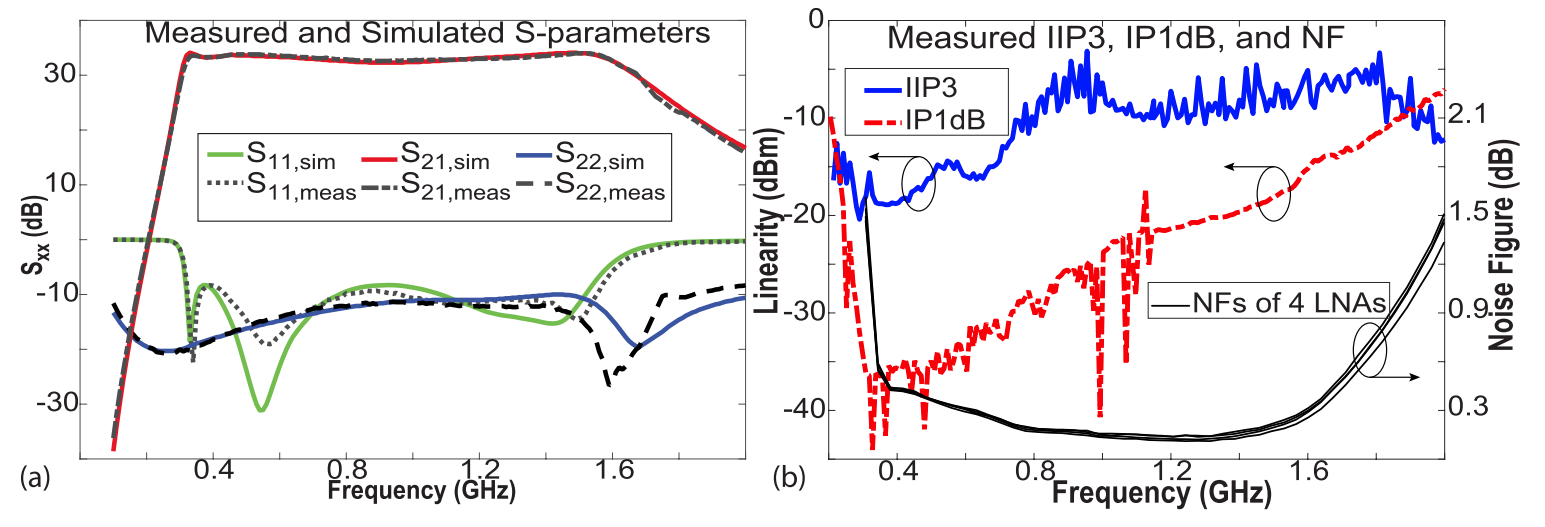


Treating the drone noise calibrator as a source, the total incident power on the telescope is the collected power by the dish that converges at the focal point. Therefore, the total incident power gathered at the feed (which is similar to the equation for $P_{rec}$ above is

$$ P_{feed} = S_{src} A_{rec} = \frac{P_{noise}}{A_{surface}} A_{rec}$$

where $A_{rec}$ is the collecting area of the dish, $P_{noise}$ is the total emitted power of the drone, and $A_{surface}$ is the surface area of the spherical wave emitted an at the flight altitude of the drone.



In [13]:
def calc_power_at_focus(agl, dish_radius, pw_emit):
    '''
    Calculate power collected by the dish and focused at the feed, emitted from the drone source flying directly over the dish at a height
    agl = height of drone flight over the dish in meters
    dish_radius = dish radius in meters
    pw_emit = power of the emitted by the drone calibration source in Watts
    CA_dish = collecting area of the dish 
    SA_radiated = surface area of the imaginary sphere whose radius is the distance between the drone source and dish
    '''
    
    CA_dish = np.pi*dish_radius**2
    SA_radiated = 4*np.pi*agl**2
    noise_flux = pw_emit/SA_radiated

    return noise_flux*CA_dish

#reverse process of calc_power_at_focus
def calc_power_emitted(agl, dish_radius, pw_focus):
    '''
    Calculate power emitted from the drone source flying directly over the dish at a height based on the power at the focus or feed
    agl = height of drone flight over the dish in meters
    dish_radius = dish radius in meters
    pw_emit = power of the emitted by the drone calibration source in Watts
    CA_dish = collecting area of the dish 
    SA_radiated = surface area of the imaginary sphere whose radius is the distance between the drone source and dish
    '''

    
    CA_dish = np.pi*dish_radius**2
    SA_radiated = 4*np.pi*agl**2
    noise_flux = pw_focus/CA_dish

    return noise_flux*SA_radiated

In [14]:
#checking the table from https://ardupilot.org/copter/docs/common-3dr-radio-advanced-configuration-and-technical-information.html
#for actual values
drone_915_pw = np.array([1., 2., 5., 8., 11., 14., 17., 20.]) #power in dBm
drone_915_pw_mW = np.array([1.3,1.6,3.2,6.3,12.5,25,50,100])/1000
W_to_dBm(drone_915_pw_mW)

array([ 1.13943352,  2.04119983,  5.05149978,  7.99340549, 10.96910013,
       13.97940009, 16.98970004, 20.        ])

In [15]:
altitude = 105
radius = 3
ant_power_mat = np.zeros_like(drone_915_pw)
for i in range(len(drone_915_pw)):
    ant_power_mat[i] = W_to_dBm(calc_power_at_focus(altitude,radius, dBm_to_W(drone_915_pw[i])))
print('105m AGL:',ant_power_mat)

altitude = 200
for i in range(len(drone_915_pw)):
    ant_power_mat[i] = W_to_dBm(calc_power_at_focus(altitude,radius, dBm_to_W(drone_915_pw[i])))
print('200m AGL:',ant_power_mat)

altitude = 120
for i in range(len(drone_915_pw)):
    ant_power_mat[i] = W_to_dBm(calc_power_at_focus(altitude,radius, dBm_to_W(drone_915_pw[i])))
print('200m AGL:',ant_power_mat)

105m AGL: [-35.9019608 -34.9019608 -31.9019608 -28.9019608 -25.9019608 -22.9019608
 -19.9019608 -16.9019608]
200m AGL: [-41.49877473 -40.49877473 -37.49877473 -34.49877473 -31.49877473
 -28.49877473 -25.49877473 -22.49877473]
200m AGL: [-37.06179974 -36.06179974 -33.06179974 -30.06179974 -27.06179974
 -24.06179974 -21.06179974 -18.06179974]


Using the -25dBm as the upper limit reference, the telemetry power should be set at 8 dBm and at 14 dBM max limit when flying 
at 105m and 200m AGL, respectively. At 120m AGL, we can use 11 dBM. 

### Mapping the uncertainty

The radiation beam pattern map obtained using a noise source attached to a drone will have uncertaintities coming from the drone position $- x,y,z$, and orientation $-$ tilting and polarization angles. In addition, the correlator quantization also contributes to the uncertainty beam map. A distribution map of the uncertainty can be generated by mapping the brightness temperature of the noise calibrator added to system temperature as a function of drone position and the beam response of the telescope. Because of the limited dynamic range of the correlator due to quantization effects, I used an Airy disk function instead of a Gaussian so that both main beams and side lobe beams can be studied. Rules for error propagation apply

In [16]:
Tsys = 50 #Kelvin
bandwidth = 390e3 #Hz
int_time = 42e-3 #seconds (integration time)
sigma_s = Tsys / np.sqrt(bandwidth*int_time) #Kelvin
print(sigma_s, 'K')

0.3906726924487462 K


In [17]:
Tsys = 50 #Kelvin
bandwidth = 400e6 #Hz
int_time = 42e-3 #seconds (integration time)
sigma_s = Tsys / np.sqrt(bandwidth*int_time) #Kelvin
print(sigma_s, 'K')

0.012198750911856666 K


For a $T_{sys} = 50 K$ with in an integration time of 42 ms, the $\sigma_{T}$ is $\sim 0.4K$ and $\sim 0.01 K$ for $390 kHz$ and $400 MHz$ bandwidth, respectively.

#### Uncertainty due to added temperature

The uncertainty changes with how much temperature is added to the system temperature according to the error propagation rules. From this, we can plot how the uncertainty varies as a function of system temperature. For a sum of two variables $x$ and $y$, then, the uncertainty is
$$ \sigma = \sqrt{\sigma_x^2 + \sigma_y^2} .$$



##### Sample calculation
In the following plots,  I used the fractional uncertainty in $\%$ instead of graphing the uncertainty $\sigma$. To understand how they are calculated, here's a sample calculation.
From our earlier results, a $T_{sys} = 50.0 K$ has a $\sigma = 0.4K$. If the system temperature is raised to $90.0K$, then the new $\sigma$ is $0.7K$. Thus, the $\sigma$ for raising the temperature by $40K$ is $0.8K$. This uncertainty divided by the added temperature is what I defined here as the fractional uncertainty $- 0.8K/40K = 2\%$. 

In [18]:
print('Sample Calculation')

Tsys = 50 #Kelvin
bandwidth = 390e3 #Hz
int_time = 42e-3 #seconds (integration time)
sigma_s = Tsys / np.sqrt(bandwidth*int_time) #Kelvin
print('50K-sigma:', sigma_s, 'K')
sigma0 = sigma_s

Tsys = 90 #Kelvin
bandwidth = 390e3 #Hz
int_time = 42e-3 #seconds (integration time)
sigma_s = Tsys / np.sqrt(bandwidth*int_time) #Kelvin
print('90K-sigma:',sigma_s, 'K')

print('Uncertainty for raising temperature by 40K')
sigma = np.sqrt(sigma0**2 + sigma_s**2)
print('new sigma:',sigma, 'K')
print('fractional:',(sigma/40)*100, '%') #newTsys - Tsys = 90 - 50 = 40K

Sample Calculation
50K-sigma: 0.3906726924487462 K
90K-sigma: 0.7032108464077431 K
Uncertainty for raising temperature by 40K
new sigma: 0.804444309527171 K
fractional: 2.011110773817928 %


/tmp/ipykernel_32943/741456250.py:16: RuntimeWarning: divide by zero encountered in divide
  fractional_uncertainty = uncertainty_T_mat/delta_T_mat


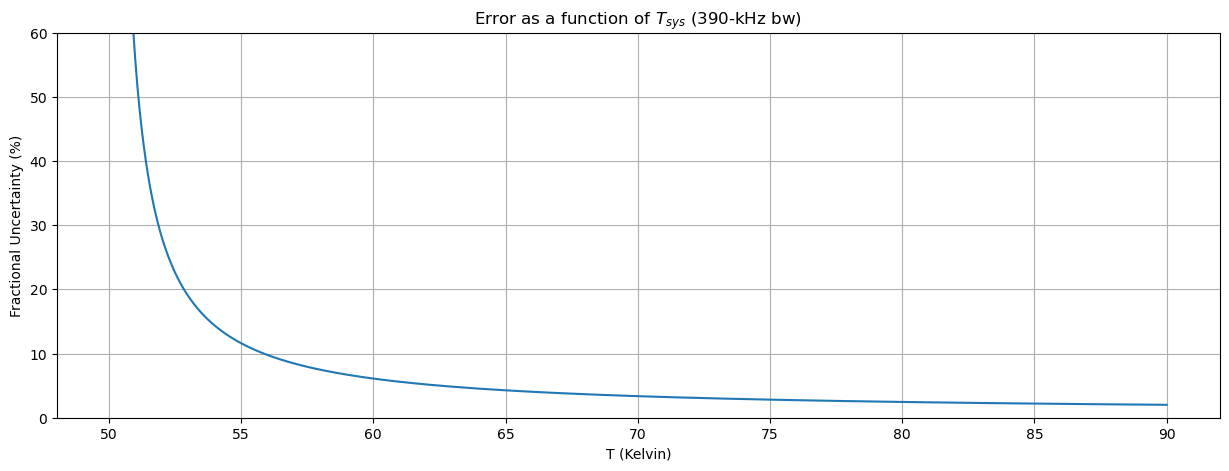

In [19]:
#Tsys = 50K; Tsys+40 = 90K
Tsys = 50
T_mat = np.linspace(Tsys,Tsys + 40,1001) 

bandwidth = 390e3 #Hz
int_time = 42e-3 #seconds (integration time)

#radiometer equation
sigma_T_mat = T_mat/np.sqrt(bandwidth*int_time)

#error propagation
uncertainty_T_mat = np.sqrt(sigma_T_mat[0]**2 + sigma_T_mat**2)
#added temperature
delta_T_mat = T_mat - T_mat[0]

fractional_uncertainty = uncertainty_T_mat/delta_T_mat
plt.figure(figsize=(15,5))
plt.plot(T_mat, fractional_uncertainty*100)
plt.ylim(0,60)

plt.title('Error as a function of $T_{sys}$ (390-kHz bw)')
plt.xlabel('T (Kelvin)')
plt.ylabel('Fractional Uncertainty (%)')
plt.grid()
plt.show()
frac_check390 = fractional_uncertainty

In [20]:
print('Sample Calculation')

Tsys = 50 #Kelvin
bandwidth = 400e6 #Hz
int_time = 42e-3 #seconds (integration time)
sigma_s = Tsys / np.sqrt(bandwidth*int_time) #Kelvin
print('50K-sigma:', sigma_s, 'K')
sigma0 = sigma_s

Tsys = 90 #Kelvin
bandwidth = 400e6 #Hz
int_time = 42e-3 #seconds (integration time)
sigma_s = Tsys / np.sqrt(bandwidth*int_time) #Kelvin
print('90K-sigma:',sigma_s, 'K')

print('Uncertainty for raising temperature by 40K')
sigma = np.sqrt(sigma0**2 + sigma_s**2)
print('new sigma:',sigma, 'K')
print('fractional:',(sigma/40)*100, '%') #newTsys - Tsys = 90 - 50 = 40K

Sample Calculation
50K-sigma: 0.012198750911856666 K
90K-sigma: 0.021957751641341998 K
Uncertainty for raising temperature by 40K
new sigma: 0.02511876551410083 K
fractional: 0.06279691378525208 %


/tmp/ipykernel_32943/436493440.py:16: RuntimeWarning: divide by zero encountered in divide
  fractional_uncertainty = uncertainty_T_mat/delta_T_mat


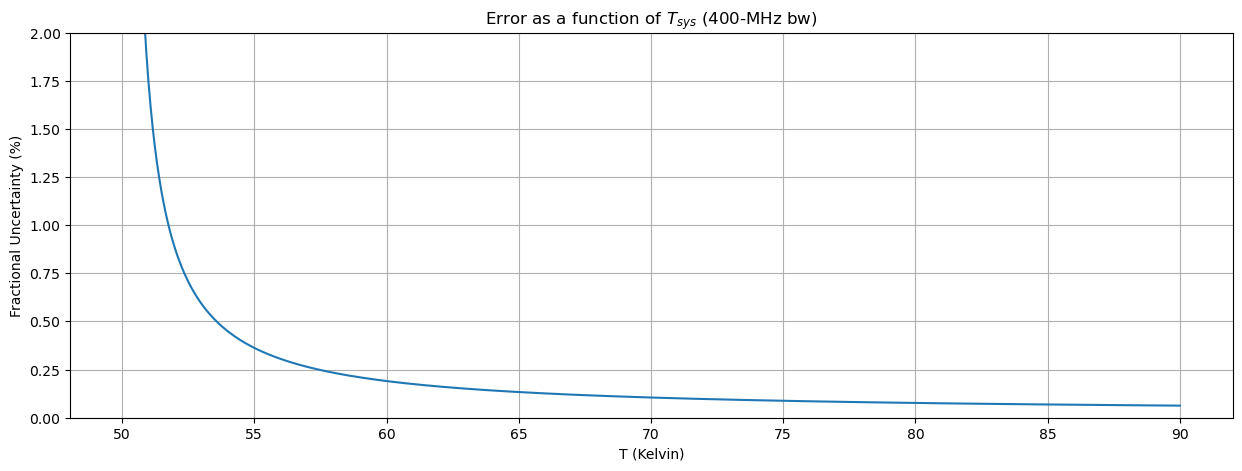

In [21]:
#Tsys = 50K; Tsys+40 = 90K
Tsys = 50
T_mat = np.linspace(Tsys,Tsys + 40,1001) 

bandwidth = 400e6 #Hz
int_time = 42e-3 #seconds (integration time)

#radiometer equation
sigma_T_mat = T_mat/np.sqrt(bandwidth*int_time)

#error propagation
uncertainty_T_mat = np.sqrt(sigma_T_mat[0]**2 + sigma_T_mat**2)
#added temperature
delta_T_mat = T_mat - T_mat[0]

fractional_uncertainty = uncertainty_T_mat/delta_T_mat
plt.figure(figsize=(15,5))
plt.plot(T_mat, fractional_uncertainty*100)
plt.ylim(0,2)

plt.title('Error as a function of $T_{sys}$ (400-MHz bw)')
plt.xlabel('T (Kelvin)')
plt.ylabel('Fractional Uncertainty (%)')
plt.grid()
plt.show()
frac_check400 = fractional_uncertainty

/tmp/ipykernel_32943/1765253355.py:20: RuntimeWarning: divide by zero encountered in divide
  fractional_uncertainty = uncertainty_T_mat/delta_T_mat


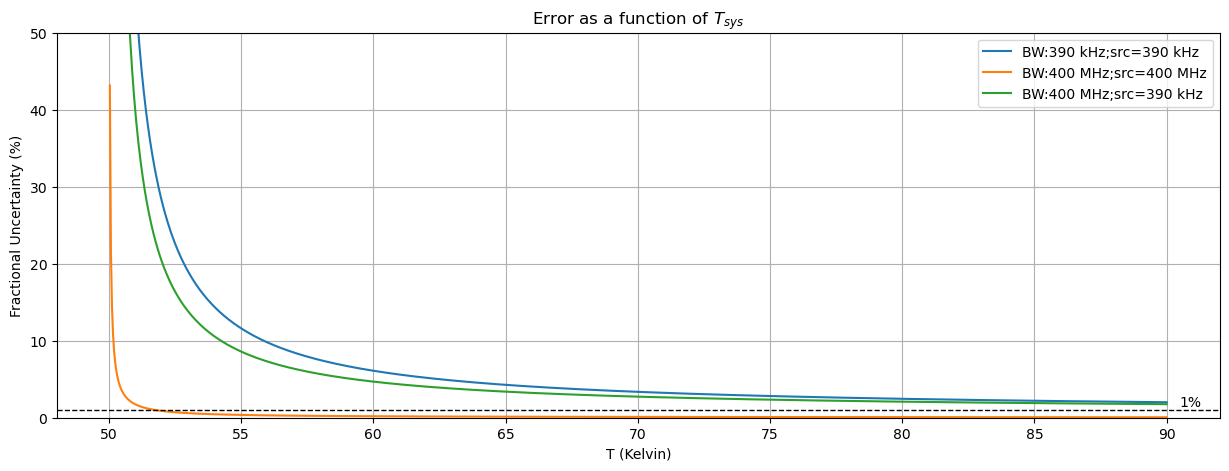

In [22]:
#Tsys = 50K; Tsys+40 = 90K
Tsys = 50
T_mat = np.linspace(Tsys,Tsys + 40,1001) 

bandwidth = 400e6 #Hz
int_time = 42e-3 #seconds (integration time)
sigma_s = Tsys / np.sqrt(bandwidth*int_time) #Kelvin

bandwidth = 390e3 #Hz
int_time = 42e-3 #seconds (integration time)

#radiometer equation
sigma_T_mat = T_mat/np.sqrt(bandwidth*int_time)

#error propagation
uncertainty_T_mat = np.sqrt(sigma_s**2 + sigma_T_mat**2)
#added temperature
delta_T_mat = T_mat - T_mat[0]

fractional_uncertainty = uncertainty_T_mat/delta_T_mat
plt.figure(figsize=(15,5))
plt.plot(T_mat, frac_check390*100, label = 'BW:390 kHz;src=390 kHz')
plt.plot(T_mat, frac_check400*100, label = 'BW:400 MHz;src=400 MHz')
plt.plot(T_mat, fractional_uncertainty*100, label = 'BW:400 MHz;src=390 kHz')
plt.ylim(0,50)

plt.title('Error as a function of $T_{sys}$')
plt.xlabel('T (Kelvin)')
plt.ylabel('Fractional Uncertainty (%)')
plt.legend(loc=1)
plt.grid()
plt.axhline(1,c='black', linestyle='--', linewidth=1)
plt.text(90.5,1.5,'1%',rotation=0)
plt.show()

What we are seeing from the plot is the wider the band, the better uncertainty we are getting. If the drone source calibrator has a 400-MHz bandwidth emission operating between 400-800 MHz, then we can achieve less than 1% at just over $2K$ added temperature. In addition, a narrow band source that drops all power into 1 channel (390 kHz) has uncertainty greater than $10\%$ for added temperature less than $4K$ and would start going down with higher added temperature until it plateaus to $2\%$.

Note: this uncertainty is different from the magnitude bias we've seen earlier. As long as we are with SNR$\sim1$ or about $50K$ temperature on top of the ambient system temperature, then the correlator will not saturate and the uncertainty due to quantization is within $\sim 1\%$.

#### Mapping the beam pattern

Before we can map the uncertainty, we need to map the radiation pattern. In order to see the effects of the side lobe, the [Airy function](https://en.wikipedia.org/wiki/Airy_disk)) is used instead of the Gaussian. The normalized beam is expressed as
$$ \frac{I'}{I_0} = \biggr[\frac{2J_1(X)}{X} \biggl]^2$$
where $I_0$ is the maximum intensity of the radiation pattern located at the center, $J_1$ is the Bessel function of the first kind of order 1, and $X = \frac{2 \pi a}{\lambda}\frac{q}{R}$. In $X$, $a$ is the aperture radius, $\lambda$ is the wavelength, $q$ is the radial distance of the observation point from the boresight axis, and $R$ is the distance of observation from the boresight axis at the aperture.


In [23]:
#for a 120m x 120m grid, you cover approx. +/-30 degrees of the beam from boresight
(np.arctan(60/105))*180/np.pi

29.744881296942225

/tmp/ipykernel_32943/3943716244.py:16: RuntimeWarning: invalid value encountered in divide
  airy_2D = (2 * scipy.special.j1(rr) / rr)**2


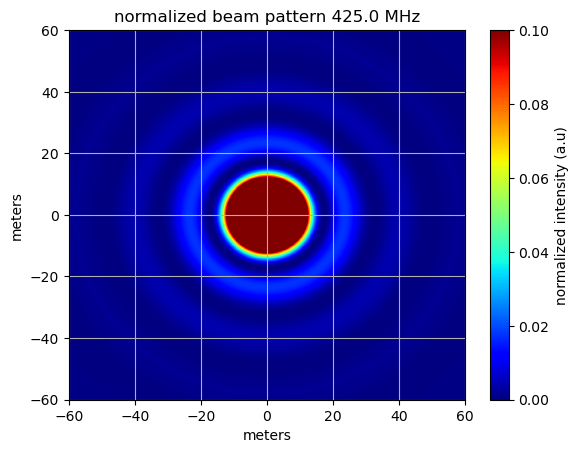

In [35]:
xlim = 60 #for a 120m x 120m grid
x = np.linspace(-xlim, xlim, 1201)
y=x
freq = 425e6
lambda_wl = 3e8/freq 
D = 6
#sigma = 1.22*lambda_wl/D
#R = scipy.special.jn_zeros(1, 1)/np.pi
#R = 1
xx, yy = np.meshgrid(x, y)
altitude = 120

q = np.sqrt((xx**2) + (yy**2))
R = np.sqrt((xx**2) + (yy**2) + altitude**2)
rr = (np.pi*D/lambda_wl)*q/R
airy_2D = (2 * scipy.special.j1(rr) / rr)**2

#correction for RuntimeWarning: invalid value encountered in true_divide
#at (0,0), the intensity should 1
searchval = 0
ii =np.array( np.where(q == searchval))
airy_2D[ii[0][0]][ii[1][0]] = 1

#plt.pcolormesh(xx,yy,airy_2D, cmap='turbo', norm=colors.LogNorm(vmin=airy_2D.min(), vmax=airy_2D.max()))
plt.pcolormesh(xx,yy,airy_2D, cmap='jet', vmax=0.1)
plt.title('normalized beam pattern {} MHz'.format(freq/1e6))
plt.colorbar(label='normalized intensity (a.u)')
plt.grid()
plt.xlabel('meters')
plt.ylabel('meters')
plt.show()

/tmp/ipykernel_32943/314786748.py:16: RuntimeWarning: invalid value encountered in divide
  airy_2D = (2 * scipy.special.j1(rr) / rr)**2


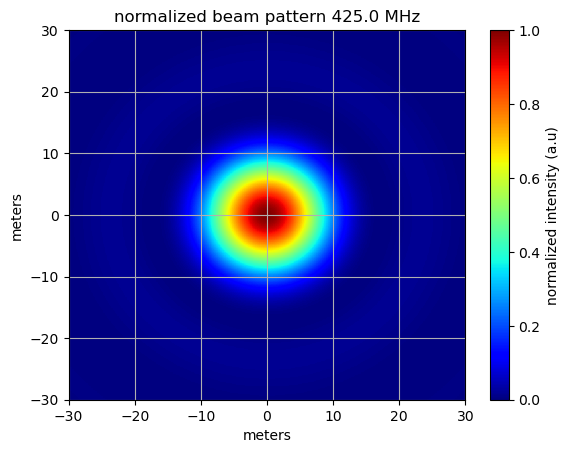

In [34]:
xlim = 60 #for a 120m x 120m grid
x = np.linspace(-xlim, xlim, 1201)
y=x
freq = 425e6
lambda_wl = 3e8/freq 
D = 6
#sigma = 1.22*lambda_wl/D
#R = scipy.special.jn_zeros(1, 1)/np.pi
#R = 1
xx, yy = np.meshgrid(x, y)
altitude = 120

q = np.sqrt((xx**2) + (yy**2))
R = np.sqrt((xx**2) + (yy**2) + altitude**2)
rr = (np.pi*D/lambda_wl)*q/R
airy_2D = (2 * scipy.special.j1(rr) / rr)**2

#correction for RuntimeWarning: invalid value encountered in true_divide
#at (0,0), the intensity should 1
searchval = 0
ii =np.array( np.where(q == searchval))
airy_2D[ii[0][0]][ii[1][0]] = 1

#plt.pcolormesh(xx,yy,airy_2D, cmap='turbo', norm=colors.LogNorm(vmin=airy_2D.min(), vmax=airy_2D.max()))
plt.pcolormesh(xx,yy,airy_2D, cmap='jet')
plt.title('normalized beam pattern {} MHz'.format(freq/1e6))
plt.colorbar(label='normalized intensity (a.u)')
plt.grid()
plt.xlim(-30,30)
plt.ylim(-30,30)
plt.xlabel('meters')
plt.ylabel('meters')
plt.show()

#### The case for a narrow band source

As I mentioned earlier, a narrow band noise calibrator source dumps all of the power into one channel (for source bandwidth < 390 kHz). First, we can ask the following questions.

How far is the drone from the ground (telescope) if one has a 120m x 120 m grid?\
And how much temperature is added to the system temperature as the drone flies through the grid?

We can start by determining the power to be emitted by drone so that when the drone is directly over the boresight axis of the telescope, the temperature is raised by a certain amount, in this case, 40K. For a narrow band source, all power is dumped into a subset of frequency channels. Since the source emits all power within 200 Hz, then, the signal is detected into one frequency channel which has a bandwidth of 390 kHz. With these values together with the flight altitude, we can set the power of the drone calibrator.

$$ P_{drone} = S_{drone} \times \Delta \nu \times A_s = \frac{T_{add}}{T_{A}/S_{src}}\times \Delta \nu \times A_s$$

In [25]:
altitude = 120 
bandwidth = 390e3
addT_sys = 40
T_S_ratio = K_per_Jy/Jy

P_n = (addT_sys / T_S_ratio) * bandwidth * (4*np.pi*(altitude**2)) 
print(P_n)

3.936548571428572e-12


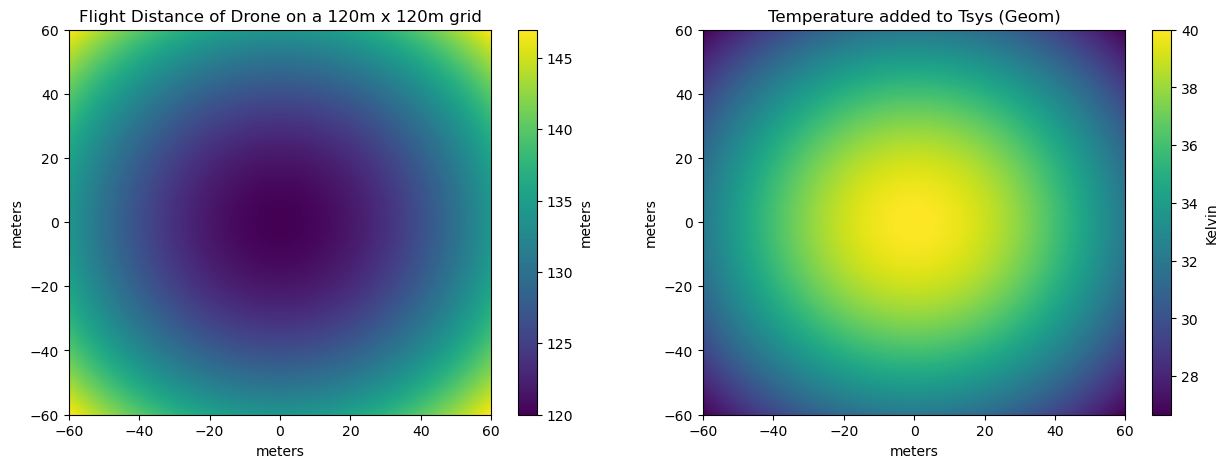

In [26]:
x = np.linspace(-60,60,1201)
y = x

X,Y = np.meshgrid(x,y)
dr_dist = np.sqrt((X**2)+(Y**2)+(altitude**2))
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pcolormesh(X,Y,dr_dist)
plt.colorbar(label='meters')
plt.title('Flight Distance of Drone on a 120m x 120m grid')
plt.xlabel('meters')
plt.ylabel('meters')



T_raised = P_n * T_S_ratio / (bandwidth * (4*np.pi*(dr_dist**2)))
plt.subplot(1,2,2)
plt.pcolormesh(X,Y,T_raised)
plt.colorbar(label='Kelvin')
plt.title('Temperature added to Tsys (Geom)')
plt.xlabel('meters')
plt.ylabel('meters')
plt.show()

Left map: flying at an altitude of 120 m within a 120m x 120m grid, the drone will be the farthest at the corners of the grid which is 135 m from the telescope. \
Right map: Temperature added to the Tsys as a function of drone position; At (0,0) of the grid, the added temperture is 40K

If our narrow band source is at 425 MHz, then we can plot the beam response of our telescope as a function of the brightness temperature.

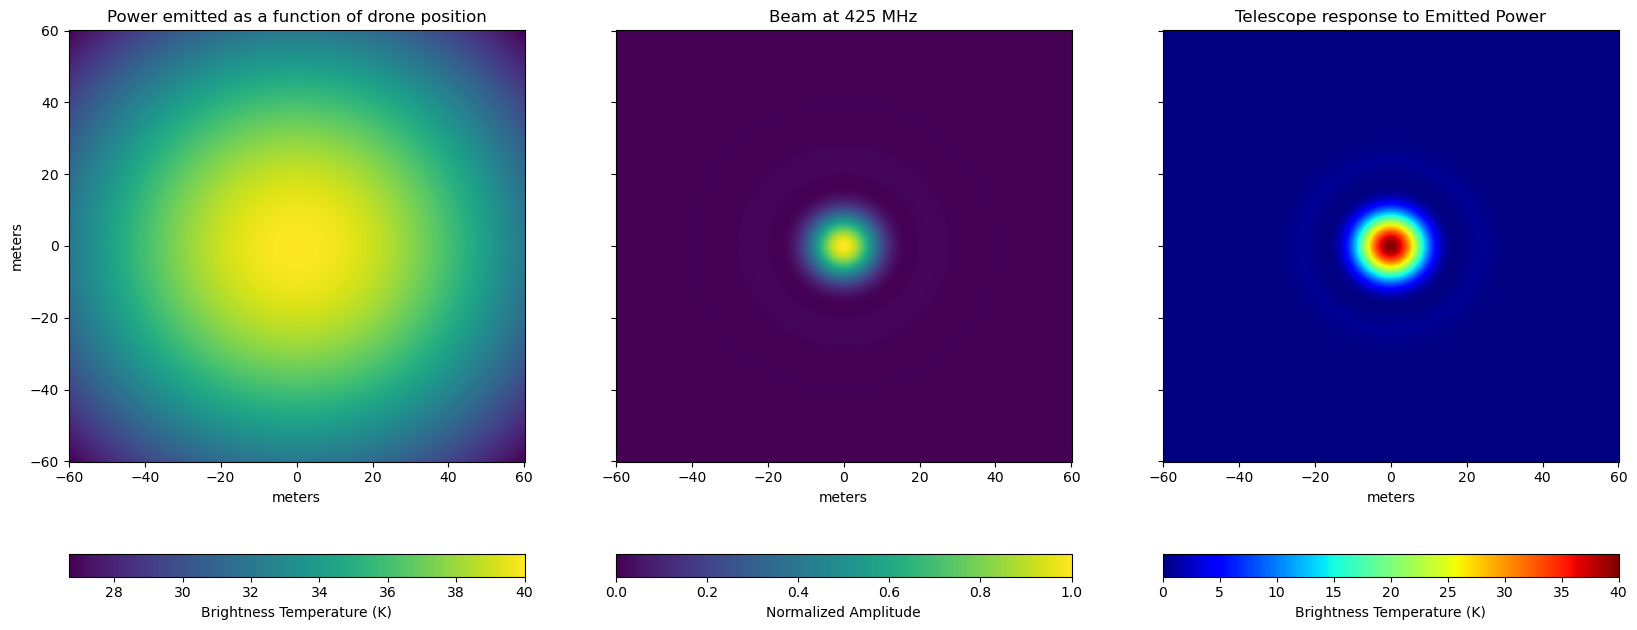

In [27]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.pcolormesh(X,Y,T_raised)
plt.colorbar(orientation='horizontal', label='Brightness Temperature (K)')
plt.xlabel('meters')
plt.ylabel('meters')
plt.title('Power emitted as a function of drone position')

plt.subplot(1,3,2)
plt.pcolormesh(X,Y,airy_2D)
plt.colorbar(orientation='horizontal', label='Normalized Amplitude')
plt.xlabel('meters')
plt.tick_params(labelleft=False)
plt.title('Beam at 425 MHz')


plt.subplot(1,3,3)
beam_response = T_raised*airy_2D
plt.pcolormesh(X,Y, beam_response, cmap='jet')
plt.colorbar(orientation='horizontal', label='Brightness Temperature (K)')
plt.xlabel('meters')
plt.tick_params(labelleft=False)
plt.title('Telescope response to Emitted Power')

plt.show()

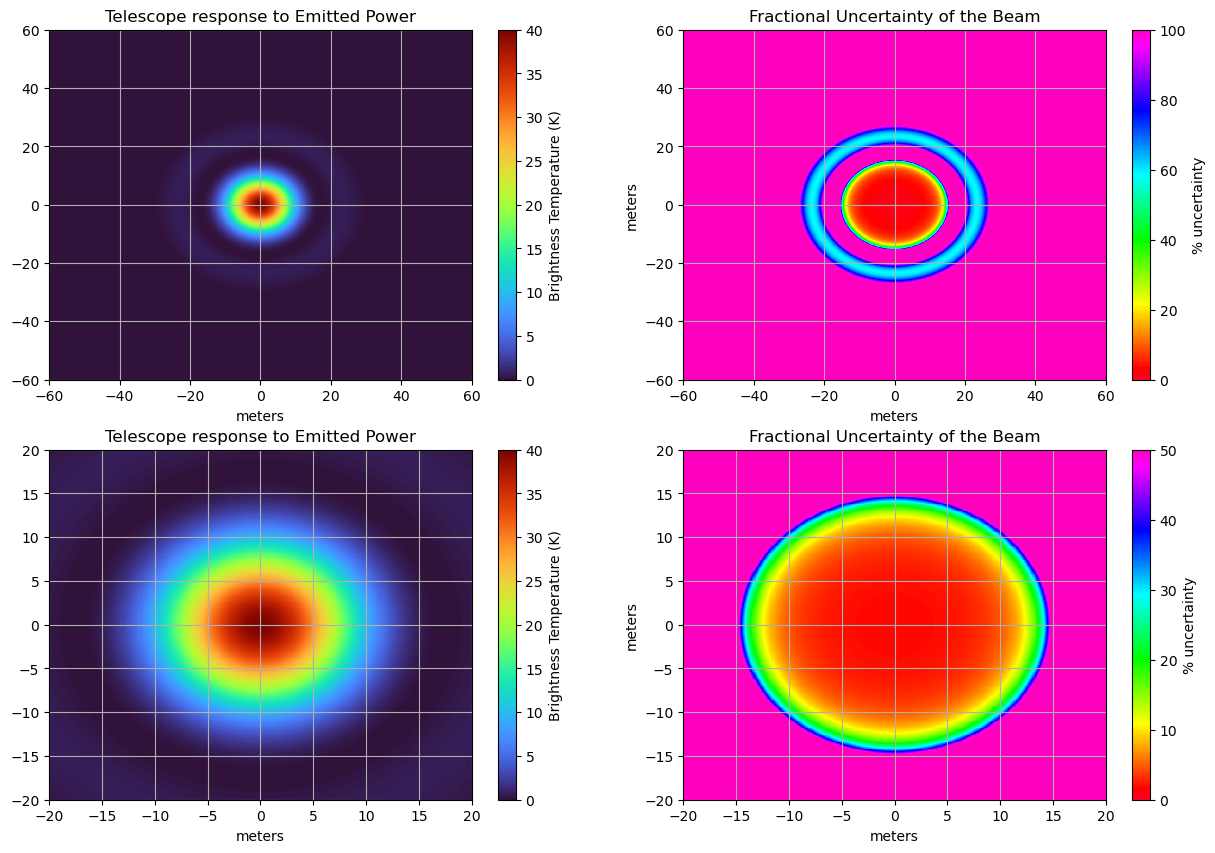

In [28]:
x = np.linspace(-60,60,1201)
y = x
altitude = 120
Tsys = 50
bandwidth = 400e6 #Hz
int_time = 42 *1e-3 #seconds (integration time)
sigma_Tsys = Tsys / np.sqrt(bandwidth*int_time) 

bandwidth = 390e3
X,Y = np.meshgrid(x,y)
dr_dist = np.sqrt((X**2)+(Y**2)+(altitude**2)) #drone distance
T_raised = P_n * T_S_ratio / (bandwidth * (4*np.pi*(dr_dist**2)))
T_raised = T_raised*airy_2D
T_mat = T_raised + Tsys

sigma_T_mat = T_mat/np.sqrt(bandwidth*int_time)

uncertainty_T_mat = np.sqrt(sigma_Tsys**2 + sigma_T_mat**2)
delta_T_mat = T_mat - Tsys

fractional_uncertainty = uncertainty_T_mat/T_raised
#plt.figure(figsize=(15,5))
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.pcolormesh(X,Y, beam_response, cmap='turbo')
#plt.pcolormesh(X,Y, beam_response, norm=colors.LogNorm(vmin=1e-1, vmax=beam_response.max()), cmap='jet')
#plt.pcolormesh(X,Y, 10*np.log10(beam_response), cmap='jet')
#plt.pcolormesh(X,Y, 10*np.log10(beam_response), norm=colors.LogNorm(vmin=1e-1, vmax=beam_response.max()), cmap='jet')
plt.colorbar(label='Brightness Temperature (K)')
plt.xlabel('meters')
plt.grid()
plt.title('Telescope response to Emitted Power')

plt.subplot(2,2,2)
plt.pcolormesh(X,Y,fractional_uncertainty*100,vmin=0, vmax=100, cmap='gist_rainbow')
#plt.pcolormesh(X,Y,T_mat,cmap='gist_rainbow')
plt.colorbar(label='% uncertainty')
plt.title('Fractional Uncertainty of the Beam')
plt.xlabel('meters')
plt.ylabel('meters')
plt.grid()



plt.subplot(2,2,3)
plt.pcolormesh(X,Y, beam_response, cmap='turbo')
#plt.pcolormesh(X,Y, beam_response, norm=colors.LogNorm(vmin=1e-1, vmax=beam_response.max()), cmap='jet')
#plt.pcolormesh(X,Y, 10*np.log10(beam_response), cmap='jet')
#plt.pcolormesh(X,Y, 10*np.log10(beam_response), norm=colors.LogNorm(vmin=1e-1, vmax=beam_response.max()), cmap='jet')
plt.colorbar(label='Brightness Temperature (K)')
plt.xlabel('meters')
plt.grid()
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.title('Telescope response to Emitted Power')

plt.subplot(2,2,4)
plt.pcolormesh(X,Y,fractional_uncertainty*100,vmin=0, vmax=50, cmap='gist_rainbow')
#plt.pcolormesh(X,Y,T_mat,cmap='gist_rainbow')
plt.colorbar(label='% uncertainty')
plt.title('Fractional Uncertainty of the Beam')
plt.xlabel('meters')
plt.ylabel('meters')
plt.grid()
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

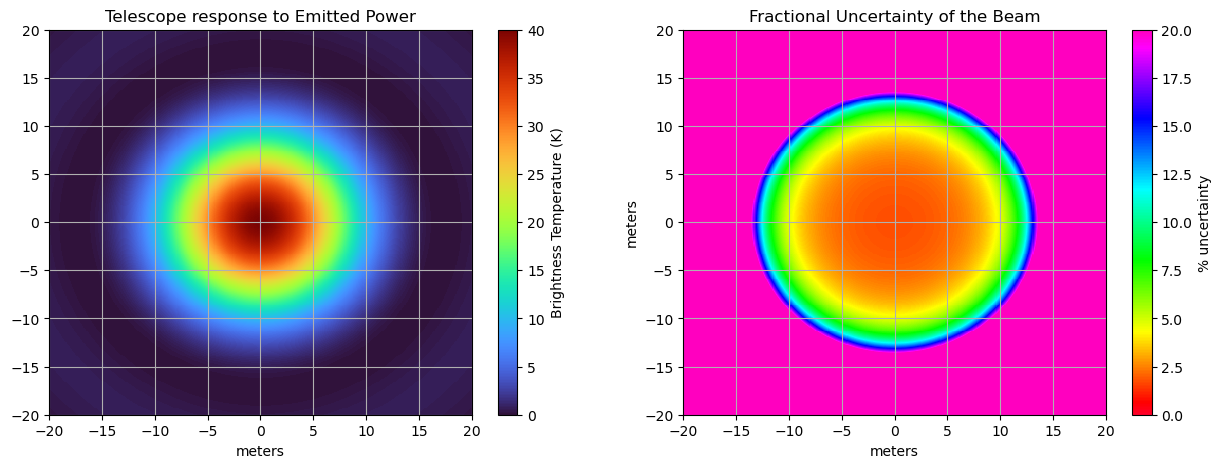

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.pcolormesh(X,Y, beam_response, cmap='turbo')
plt.colorbar(label='Brightness Temperature (K)')
plt.xlabel('meters')
plt.title('Telescope response to Emitted Power')
plt.grid()
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.subplot(1,2,2)

plt.pcolormesh(X,Y,fractional_uncertainty*100,vmin=0, vmax=20, cmap='gist_rainbow')
plt.colorbar(label='% uncertainty')
plt.title('Fractional Uncertainty of the Beam')
plt.xlabel('meters')
plt.ylabel('meters')
plt.grid()
plt.xlim(-20,20)
plt.ylim(-20,20)
plt.show()

From these maps, we can see that within the main lobe, the estimated uncertainty from beam measurement is within $5\%$ or less. We can also observe that at the first ring or sidelobe, the uncertainty increases to about $60 - 80 \%$.

Next:
- the case for wide band source
- fitting Zernike to the measured beams